In [1]:
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#for polynomial eq import the below statement
from sklearn.preprocessing import PolynomialFeatures
from numpy import mean
from numpy import std
from numpy import cov
from scipy.stats import pearsonr

In [2]:
data_tweets = pd.read_csv('tweets_data_0121_0205.csv')
pos = np.array(data_tweets['Positives'])
neg = np.array(data_tweets['Negatives'])
neu = np.array(data_tweets['Neutrals'])
senti=np.array([])
for i in range(len(pos)):
    senti = np.append(senti , pos[i])
    senti = np.append(senti , neg[i])
    senti = np.append(senti , neu[i])
    
senti = senti.reshape((-1,3))
senti = senti.astype(int)
senti

array([[ 25,  11,  45],
       [ 25,  16,  69],
       [ 16,  14,  87],
       [ 44,  21, 135],
       [ 43,  15, 132],
       [ 40,  23, 111],
       [ 37,  12,  81],
       [ 10,   7,  20],
       [  9,   7,  23],
       [  9,   5,  29],
       [ 11,   5,  25],
       [ 16,  12,  25],
       [ 16,   7,  37],
       [ 12,   6,  31],
       [ 11,  13,  37],
       [ 10,   6,  25]])

In [3]:
data_stocks = pd.read_csv('BP.csv')
#pos = np.array(data_tweets['Date'])
#pos
#print(data_tweets)
stock = data_stocks.drop(columns=['Date'])
stock=stock.to_numpy()
stock

array([[3.08500e+01, 3.10800e+01, 3.05500e+01, 3.07100e+01, 1.74726e+07],
       [2.94000e+01, 2.99900e+01, 2.88900e+01, 2.99800e+01, 2.09937e+07],
       [3.02500e+01, 3.14800e+01, 2.98500e+01, 3.14000e+01, 1.76550e+07],
       [3.20100e+01, 3.21300e+01, 3.12400e+01, 3.15000e+01, 1.66200e+07],
       [3.20200e+01, 3.21500e+01, 3.11400e+01, 3.15300e+01, 1.46987e+07],
       [3.10500e+01, 3.13500e+01, 3.06500e+01, 3.10700e+01, 1.46092e+07],
       [3.11200e+01, 3.11400e+01, 3.07500e+01, 3.09200e+01, 1.01790e+07],
       [3.12000e+01, 3.18900e+01, 3.10700e+01, 3.17600e+01, 1.54091e+07],
       [3.18000e+01, 3.20300e+01, 3.16200e+01, 3.19600e+01, 1.17752e+07],
       [3.20700e+01, 3.23400e+01, 3.16800e+01, 3.21500e+01, 1.31731e+07],
       [3.27200e+01, 3.31900e+01, 3.26900e+01, 3.28800e+01, 1.69326e+07]])

In [4]:
np.set_printoptions(suppress=True)

In [5]:
stock

array([[      30.85,       31.08,       30.55,       30.71, 17472600.  ],
       [      29.4 ,       29.99,       28.89,       29.98, 20993700.  ],
       [      30.25,       31.48,       29.85,       31.4 , 17655000.  ],
       [      32.01,       32.13,       31.24,       31.5 , 16620000.  ],
       [      32.02,       32.15,       31.14,       31.53, 14698700.  ],
       [      31.05,       31.35,       30.65,       31.07, 14609200.  ],
       [      31.12,       31.14,       30.75,       30.92, 10179000.  ],
       [      31.2 ,       31.89,       31.07,       31.76, 15409100.  ],
       [      31.8 ,       32.03,       31.62,       31.96, 11775200.  ],
       [      32.07,       32.34,       31.68,       32.15, 13173100.  ],
       [      32.72,       33.19,       32.69,       32.88, 16932600.  ]])

In [6]:
'''
00: 21.Jan
01: 24.Jan , Monday
02: 25.Jan
03: 26.Jan
04: 27.Jan
05: 28.Jan
06: 31.Jan , Monday
07: 01.Feb
08: 02.Feb
09: 03.Feb
10: 04.Feb



senti = np.array(tweets_array)
stock=df
'''

senti[3]=(senti[3]+senti[1]+senti[2])/3
senti[10]=(senti[10]+senti[8]+senti[9])/3

senti=np.delete(senti, 1,0)
senti=np.delete(senti, 1,0)
senti=np.delete(senti, 6,0)
senti=np.delete(senti, 6,0)
senti=np.delete(senti, 11,0)


print(senti)
print('-----------------')
print(stock)
print('-----------------')
print("Sentiment length: " , len(senti))
print("Stock length: " , len(stock))


[[ 25  11  45]
 [ 28  17  97]
 [ 43  15 132]
 [ 40  23 111]
 [ 37  12  81]
 [ 10   7  20]
 [  9   5  25]
 [ 16  12  25]
 [ 16   7  37]
 [ 12   6  31]
 [ 11  13  37]]
-----------------
[[      30.85       31.08       30.55       30.71 17472600.  ]
 [      29.4        29.99       28.89       29.98 20993700.  ]
 [      30.25       31.48       29.85       31.4  17655000.  ]
 [      32.01       32.13       31.24       31.5  16620000.  ]
 [      32.02       32.15       31.14       31.53 14698700.  ]
 [      31.05       31.35       30.65       31.07 14609200.  ]
 [      31.12       31.14       30.75       30.92 10179000.  ]
 [      31.2        31.89       31.07       31.76 15409100.  ]
 [      31.8        32.03       31.62       31.96 11775200.  ]
 [      32.07       32.34       31.68       32.15 13173100.  ]
 [      32.72       33.19       32.69       32.88 16932600.  ]]
-----------------
Sentiment length:  11
Stock length:  11


In [7]:
tot = np.sum(senti,axis=1)
senti = np.insert(senti,3,tot,axis=1)
senti

array([[ 25,  11,  45,  81],
       [ 28,  17,  97, 142],
       [ 43,  15, 132, 190],
       [ 40,  23, 111, 174],
       [ 37,  12,  81, 130],
       [ 10,   7,  20,  37],
       [  9,   5,  25,  39],
       [ 16,  12,  25,  53],
       [ 16,   7,  37,  60],
       [ 12,   6,  31,  49],
       [ 11,  13,  37,  61]])

In [8]:
x = senti[:,3]
y = stock[:,3]
p = x.argsort()
x = x[p]
y = y[p]
print(x)
print(y)

[ 37  39  49  53  60  61  81 130 142 174 190]
[31.07 30.92 32.15 31.76 31.96 32.88 30.71 31.53 29.98 31.5  31.4 ]


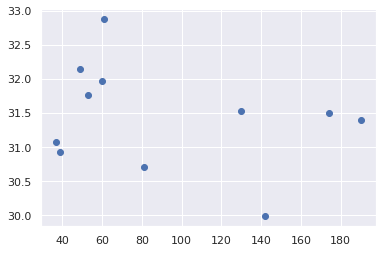

In [9]:
plt.scatter(x,y)
plt.show()
#x axis tweets, y axis close value

In [10]:
covar = cov(x,y)
print(covar)

[[3158.05454545  -11.69372727]
 [ -11.69372727    0.60355636]]


In [11]:
corr,_ = pearsonr(x,y)
print('Pearson coeff:',corr)

Pearson coeff: -0.26784542378196174


linear equation, degree 1

In [12]:
x1=x.reshape((-1,1))
print(x1)

[[ 37]
 [ 39]
 [ 49]
 [ 53]
 [ 60]
 [ 61]
 [ 81]
 [130]
 [142]
 [174]
 [190]]


In [13]:
model = LinearRegression().fit(x1,y)
rsq = model.score(x1,y)
print('Coeff of covar:',rsq)
print('Intercept:',model.intercept_)
print('Slope:',model.coef_)

Coeff of covar: 0.07174117104093891
Intercept: 31.78382467917533
Slope: [-0.00370283]


In [14]:
y_pred = model.predict(x1)
print('predicted response:',y_pred, sep='\n')

predicted response:
[31.64682011 31.63941446 31.60238619 31.58757489 31.5616551  31.55795228
 31.48389575 31.30245727 31.25802335 31.13953291 31.08028769]


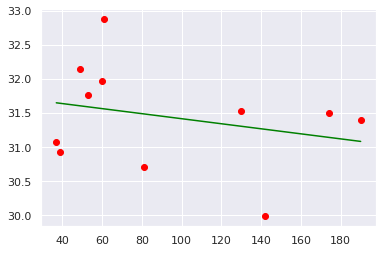

In [15]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='green')
#plt.title("Linear eq in 1 variable")
#plt.xlabel("Difference in twitter mood")
#plt.ylabel("Change in stock value")
plt.show()

quadratic equation, degree = 2

In [16]:
x2 = PolynomialFeatures(degree=2).fit_transform(x1)
print(x2)

[[    1.    37.  1369.]
 [    1.    39.  1521.]
 [    1.    49.  2401.]
 [    1.    53.  2809.]
 [    1.    60.  3600.]
 [    1.    61.  3721.]
 [    1.    81.  6561.]
 [    1.   130. 16900.]
 [    1.   142. 20164.]
 [    1.   174. 30276.]
 [    1.   190. 36100.]]


In [17]:
model2 = LinearRegression().fit(x2,y)
rsq2 = model2.score(x2,y)
print('Coeff of covar:',rsq2)
print('Slope:',model2.coef_)
print('Intercept:',model2.intercept_)

Coeff of covar: 0.08449627506783086
Slope: [ 0.         -0.01354886  0.00004472]
Intercept: 32.1833931987457


In [18]:
y_pred2 = model2.predict(x2)
print('predicted response:', y_pred2, sep='\n')

predicted response:
[31.74330103 31.72300008 31.62686119 31.5909097  31.5314377  31.52329943
 31.37931445 31.17773457 31.16109986 31.17970014 31.22334184]


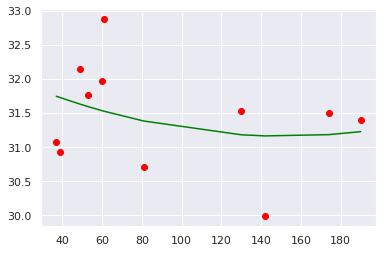

In [19]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred2,color='green')
#plt.plot(x,y_predq,'ro-')
plt.show()

cubic equation, degree = 3

[[      1.      37.    1369.   50653.]
 [      1.      39.    1521.   59319.]
 [      1.      49.    2401.  117649.]
 [      1.      53.    2809.  148877.]
 [      1.      60.    3600.  216000.]
 [      1.      61.    3721.  226981.]
 [      1.      81.    6561.  531441.]
 [      1.     130.   16900. 2197000.]
 [      1.     142.   20164. 2863288.]
 [      1.     174.   30276. 5268024.]
 [      1.     190.   36100. 6859000.]]
Coeff of covar: 0.33401813970990923
Slope: [ 0.          0.13659517 -0.001455    0.00000442]
Intercept: 27.97097106329115
predicted response:
[31.2568454  31.34715565 31.69036537 31.78104772 31.88280733 31.8918532
 31.83642807 30.84350178 30.67666865 30.95701361 31.69631322]


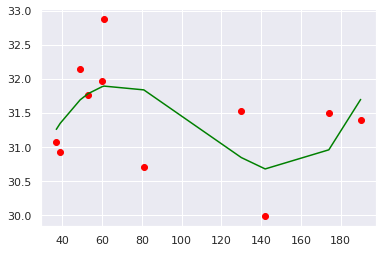

In [20]:
x3 = PolynomialFeatures(degree=3).fit_transform(x1)
print(x3)

model3 = LinearRegression().fit(x3,y)

rsq3 = model3.score(x3,y)
print('Coeff of covar:',rsq3)
print('Slope:',model3.coef_)
print('Intercept:',model3.intercept_)

y_pred3 = model3.predict(x3)
print('predicted response:', y_pred3, sep='\n')

plt.scatter(x,y,color='red')
plt.plot(x,y_pred3,color='green')
plt.show()

degree = 4

[[1.00000000e+00 3.70000000e+01 1.36900000e+03 5.06530000e+04
  1.87416100e+06]
 [1.00000000e+00 3.90000000e+01 1.52100000e+03 5.93190000e+04
  2.31344100e+06]
 [1.00000000e+00 4.90000000e+01 2.40100000e+03 1.17649000e+05
  5.76480100e+06]
 [1.00000000e+00 5.30000000e+01 2.80900000e+03 1.48877000e+05
  7.89048100e+06]
 [1.00000000e+00 6.00000000e+01 3.60000000e+03 2.16000000e+05
  1.29600000e+07]
 [1.00000000e+00 6.10000000e+01 3.72100000e+03 2.26981000e+05
  1.38458410e+07]
 [1.00000000e+00 8.10000000e+01 6.56100000e+03 5.31441000e+05
  4.30467210e+07]
 [1.00000000e+00 1.30000000e+02 1.69000000e+04 2.19700000e+06
  2.85610000e+08]
 [1.00000000e+00 1.42000000e+02 2.01640000e+04 2.86328800e+06
  4.06586896e+08]
 [1.00000000e+00 1.74000000e+02 3.02760000e+04 5.26802400e+06
  9.16636176e+08]
 [1.00000000e+00 1.90000000e+02 3.61000000e+04 6.85900000e+06
  1.30321000e+09]]
Coeff of covar: 0.4719044355954448
Slope: [ 0.          0.52354653 -0.00801922  0.00004839 -0.0000001 ]
Intercept: 20.3

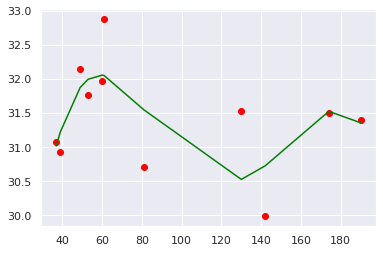

In [21]:
x4 = PolynomialFeatures(degree=4).fit_transform(x1)
print(x4)

model4 = LinearRegression().fit(x4,y)

rsq4 = model4.score(x4,y)
print('Coeff of covar:',rsq4)
print('Slope:',model4.coef_)
print('Intercept:',model4.intercept_)

y_pred4 = model4.predict(x4)
print('predicted response:', y_pred4, sep='\n')

plt.scatter(x,y,color='red')
plt.plot(x,y_pred4,color='green')
plt.show()